In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, List, Tuple, Dict, Any

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, r2_score, confusion_matrix, classification_report
)

# Display Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 120
import warnings
warnings.filterwarnings('ignore')

Loaded: (200000, 24)
Shape: (200000, 24)

Column Data Types:
 object     20
int64       2
float64     2
Name: count, dtype: int64

No missing values found.

Target Class Balance (Is_Fraud):
 Is_Fraud
0    0.94956
1    0.05044
Name: proportion, dtype: float64


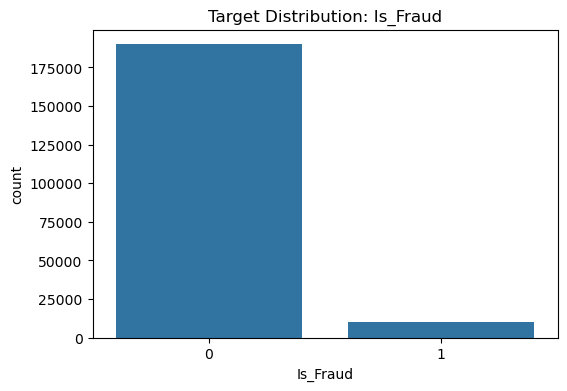

No missing values found.


d:\Portofolio\Fraud Detection TXN\notebooks\../src\preprocessing.py:27: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  temp_date = pd.to_datetime(df["Transaction_Date"], errors="coerce")


Saved processed CSV: (200000, 84)


In [1]:
import sys
sys.path.append("../src/")

from eda_utils import eda_descriptive, plot_target_distribution, plot_missing_heatmap
from preprocessing import clean_missing, drop_irrelevant_columns, feature_engineering_advanced, encode_categorical
import pandas as pd

# --- Load raw CSV ---
df = pd.read_csv("../data/raw/Bank_Transaction_Fraud_Detection.csv")
print("Loaded:", df.shape)

# --- EDA ---
eda_descriptive(df)
plot_target_distribution(df)
plot_missing_heatmap(df)

# --- Clean / Preprocess ---
df = clean_missing(df)
df = drop_irrelevant_columns(df, [
    "Customer_ID", "Customer_Name","Merchant_ID", 
    "Customer_Contact", "Customer_Email","Transaction_ID", 
    "Transaction_Description", "Transaction_Currency"
])
df = feature_engineering_advanced(df)
df = encode_categorical(df, drop_first=False, max_cardinality=50)

# --- Save processed CSV ---
df.to_csv("../data/processed/bank_transactions_features.csv", index=False)
print("Saved processed CSV:", df.shape)


In [3]:
df=pd.read_csv("../data/processed/bank_transactions_features.csv")
df.head()


,Age,Transaction_Amount,Account_Balance,Is_Fraud,Transaction_Hour,Transaction_Day,Transaction_Weekday,City_Freq,Bank_Branch_Freq,Transaction_Location_Freq,...,Transaction_Device_Smart Card,Transaction_Device_Tablet,Transaction_Device_Virtual Card,Transaction_Device_Voice Assistant,Transaction_Device_Wearable Device,Transaction_Device_Web Browser,Device_Type_ATM,Device_Type_Desktop,Device_Type_Mobile,Device_Type_POS
0,60,32415.45,74557.27,0,16,23,3,0.005700,0.005700,0.005700,...,0,0,0,1,0,0,0,0,0,1
1,51,43622.60,74622.66,0,17,11,5,0.005625,0.005625,0.005625,...,0,0,0,0,0,0,0,1,0,0
2,20,63062.56,66817.99,0,3,25,5,0.005695,0.005695,0.005695,...,0,0,0,0,0,0,0,1,0,0
3,57,14000.72,58177.08,0,12,19,6,0.005805,0.005805,0.005805,...,0,0,0,0,0,0,0,0,1,0
4,43,18335.16,16108.56,0,18,30,3,0.005860,0.005860,0.005860,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# # --- Loading & EDA Functions ---


# def load_csv(path: str, nrows: Optional[int] = None, **read_kwargs) -> pd.DataFrame:
#     """Load a CSV into a DataFrame."""
#     try:
#         return pd.read_csv(path, nrows=nrows, **read_kwargs)
#     except FileNotFoundError as e:
#         raise FileNotFoundError(f"CSV file not found: {path}") from e

# def overview(df: pd.DataFrame) -> Dict[str, Any]:
#     """Return simple overview info about a DataFrame."""
#     return {
#         "shape": df.shape,
#         "dtypes": df.dtypes.value_counts(),
#         "missing": df.isnull().sum().sum()
#     }
# def eda_descriptive(df: pd.DataFrame, n_head: int = 5) -> dict:
#     """Return and print descriptive EDA summaries."""
#     out = {}
#     out["shape"] = df.shape
#     out["head"] = df.head(n_head)
#     out["dtypes"] = df.dtypes.value_counts().to_dict()
#     out["missing_count"] = df.isnull().sum().sort_values(ascending=False).head(30)
#     out["missing_pct"] = (df.isnull().mean() * 100).sort_values(ascending=False).head(30)
    
#     # Check if there are numeric columns before describing
#     numeric_df = df.select_dtypes(include=[np.number])
#     if not numeric_df.empty:
#         out["numeric_desc"] = numeric_df.describe().T
#     else:
#         out["numeric_desc"] = pd.DataFrame()

#     out["categorical_vals"] = {
#         c: int(df[c].nunique()) for c in df.select_dtypes(include=["object", "category"]).columns
#     }
    
#     # print short summary
#     print("Shape:", out["shape"])
#     print("\nTop dtypes:\n", out["dtypes"])
#     print("\nHead:")
#     display(out["head"])
#     print("\nTop missing (count):")
#     display(out["missing_count"])
#     print("\nTop missing (pct):")
#     display(out["missing_pct"])
#     print("\nNumeric summary (top rows):")
#     display(out["numeric_desc"].head(10))
#     print("\nCategorical cardinalities (sample 20):")
#     display(pd.Series(out["categorical_vals"]).sort_values(ascending=False).head(20))
#     return out


# def plot_target_distribution(df: pd.DataFrame, target: str = "Is_Fraud"):
#     if target not in df.columns:
#         print(f"Target '{target}' not found; available: {list(df.columns)[:40]}")
#         return
#     vc = df[target].value_counts(dropna=False)
#     print("Value counts:\n", vc)
#     plt.figure(figsize=(8, 4))
#     sns.barplot(x=vc.index.astype(str), y=vc.values)
#     plt.title(f"Target distribution: {target}")
#     plt.ylabel("count")
#     plt.show()
# def numeric_eda_plots(df: pd.DataFrame, target: str = "Is_Fraud", top_corr: int = 12):
#     """
#     Plots numeric distributions. 
#     - If target exists: Plots Boxplots and includes the count (n) in the x-axis labels.
#     - If no target: Plots Histograms and labels the bar counts.
#     """
#     nums = df.select_dtypes(include=[np.number]).copy()
#     if nums.shape[1] == 0:
#         print("No numeric columns to analyze.")
#         return

#     # --- Correlation Logic ---
#     if target in nums.columns:
#         corr = nums.corr()[target].abs().sort_values(ascending=False).head(top_corr)
#         print("Top correlations with target:")
#         display(corr.to_frame())
#     else:
#         corrmat = nums.corr()
#         top_pairs = (corrmat.abs().unstack().sort_values(ascending=False).drop_duplicates().head(top_corr))
#         print("Top numeric correlations (pairs):")
#         display(top_pairs.to_frame())
    
#     # --- Plotting Logic ---
#     top_cols = nums.columns.drop([target]) if target in nums.columns else nums.columns
#     # Limit to first 6 to avoid too many plots
#     top_cols = top_cols[:6]
    
#     for c in top_cols:
#         plt.figure(figsize=(8, 4))
        
#         # 1. TARGET EXISTS: Boxplot with Counts on X-Axis
#         if target in df.columns:
#             # Create the boxplot
#             ax = sns.boxplot(x=df[target].astype(str), y=df[c])
#             plt.title(f"{c} by {target}")
            
#             # Calculate counts for the target categories
#             counts = df[target].astype(str).value_counts()
            
#             # Update X-axis labels to include the count (n=...)
#             x_labels = [label.get_text() for label in ax.get_xticklabels()]
#             new_labels = [f"{lbl}\n(n={counts.get(lbl, 0)})" for lbl in x_labels]
#             ax.set_xticklabels(new_labels)

#         # 2. NO TARGET: Histogram with Bar Labels
#         else:
#             ax = sns.histplot(df[c].dropna(), kde=True)
#             plt.title(c)
            
#             # Add labels to the top of histogram bars
#             # Note: kde=True adds a line, but bar_label attaches to the bar containers
#             for container in ax.containers:
#                 ax.bar_label(container)

#         plt.tight_layout()
#         plt.show()

# def categorical_eda(df: pd.DataFrame, max_cols: int = 10):
#     cats = df.select_dtypes(include=["object", "category"]).columns.tolist()
#     if not cats:
#         print("No categorical columns.")
#         return
#     sample = cats[:max_cols]
#     for c in sample:
#         vc = df[c].value_counts(dropna=False).head(15)
#         print(f"\nColumn: {c} (n_unique={df[c].nunique()})")
#         display(vc)
#         plt.figure(figsize=(8, 3))
#         sns.barplot(x=vc.values, y=[str(x) for x in vc.index])
#         plt.title(c)
#         plt.show()

# def clean_missing(
#      df: pd.DataFrame,
#      drop_threshold: float = 0.5,
#      fill_method: Optional[str] = None,
#      fill_value: Optional[Any] = None
# ) -> pd.DataFrame:
#     """
#     Clean missing values:
#     - Drop columns with fraction of missing > drop_threshold.
#     - If fill_method is 'ffill' or 'bfill' uses pandas fillna.
#     - If fill_value provided, fills remaining NA with that value.
#     """
#     df = df.copy()
#     frac_missing = df.isnull().mean()
#     drop_cols = frac_missing[frac_missing > drop_threshold].index.tolist()
#     if drop_cols:
#         df.drop(columns=drop_cols, inplace=True)
    
#     # Note: method='ffill' is deprecated in newer pandas versions, 
#     # but kept here to preserve logic. 
#     if fill_method in ("ffill", "bfill"):
#         df.fillna(method=fill_method, inplace=True)
#     if fill_value is not None:
#         df.fillna(fill_value, inplace=True)
#     return df

# def plot_missing_heatmap(df: pd.DataFrame, sample_frac: float = 0.2):
#     """
#     Plot a heatmap of missing values.
#     Yellow lines indicate missing data.
#     """
#     # Check if there is any missing data first
#     if df.isnull().sum().sum() == 0:
#         print("Good news: No missing values found in the DataFrame.")
#         return

#     # Sample for speed if dataset is large
#     if len(df) > 50000 and sample_frac < 1.0:
#         print(f"Plotting missingness on {sample_frac*100}% sample...")
#         df_plot = df.sample(frac=sample_frac, random_state=42)
#     else:
#         df_plot = df
        
#     plt.figure(figsize=(12, 6))
#     sns.heatmap(df_plot.isnull(), cbar=False, yticklabels=False, cmap='viridis')
#     plt.title("Missing Values Map (Yellow = Missing)")
#     plt.xlabel("Columns")
#     plt.show()

# def drop_irrelevant_columns(df: pd.DataFrame, columns_to_drop: List[str]) -> pd.DataFrame:
#     """Drop irrelevant columns from the DataFrame."""
#     df = df.copy()
#     existing_cols = [col for col in columns_to_drop if col in df.columns]
#     if existing_cols:
#         df.drop(columns=existing_cols, inplace=True)
#         print(f"Dropped columns: {existing_cols}")
#     else:
#         print("No irrelevant columns found to drop.")
#     return df